
$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\Dv}{\mathbf{D}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Introduction to Neural Networks

## Activation Functions

Last time we saw how transforming the inputs using fixed nonlinear functions does result in models that are nonlinear in the inputs.  However, there is no general way to know which nonlinear functions to use. 

A more general approach is to pick the form of a nonlinear function that is controlled by parameters, or weights,  whose values control the actual shape of the function. There are many possibilities for constructing such functions. Let's add some desireable properties:

   1. Computationally simple.
   2. For initial, small, weight values the function is close to linear.  As the weight magnitudes grow, the function becomes increasingly nonlinear.
   3. The derivative of the function is computationally simple.
   4. The magnitude of the derivative decreases as the weight magnitudes grows, perhaps asymptotically.
   5. The maximum value of the magnitude of the derivative is limited.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start with a linear weighted sum, $s = \wv^T \xv$.  So, for a particular input sample $\xv$, $s$ is small if the magnitudes of the weights of $\wv$ are near zero.  As the weight magnitudes increase, the magnitude of $s$ increases.  So let's try to construct a function of $s$ in the shape of the derivative that we want.

We know that using $s$ as an exponent can make functions asymptotically decrease to zero.  Let's use base $e$, in case we deal with natural logarithms in the future.

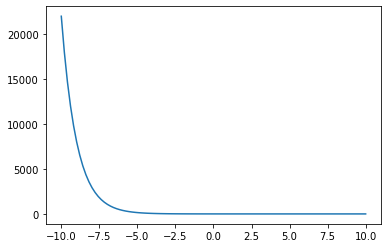

In [2]:
s = np.linspace(-10, 10, 100)
plt.plot(s, np.exp(-s));

Remember, we are constructing a derivative, so we want to limit the maximum value of the derivative.

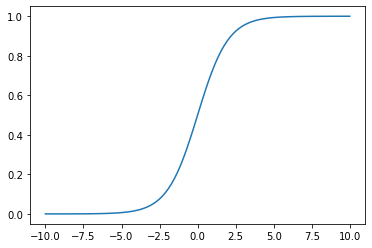

In [3]:
plt.plot(s, 1/(1 + np.exp(-s)));

Looking good.  Does what we want as $s$ grows more negative, but we also want to bring this function down to zero as $s$ becomes more positive.

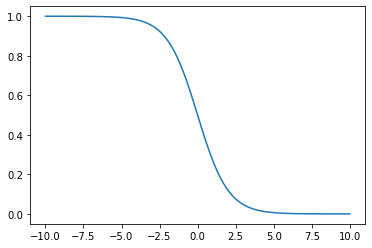

In [4]:
plt.plot(s, 1 - 1/(1 + np.exp(-s)));

Okay.  Now how can we combine these.  How about just multiply them?

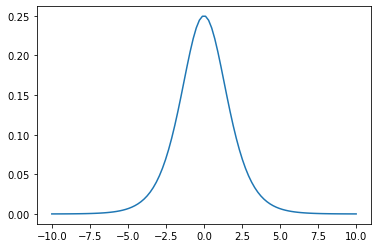

In [5]:
plt.plot(s, 1/(1 + np.exp(-s)) * (1 - 1/(1 + np.exp(-s))));

Hey!  Looks great.  It asymptotes to zero as the magnitude of $s$ grows and the maximum value is limited at 0.25.

How simple is it?  Well, there are common terms.

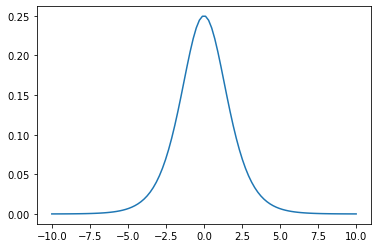

In [6]:
y = 1  / (1 + np.exp(-s))
plt.plot(s, y * (1 - y));

Okay, if we like this derivative, all we have to do is integrate it to get an activation function.

Let's use python's [`sympy`](https://www.sympy.org/en/index.html) package to do this.

In [7]:
import sympy
sympy.init_printing(use_unicode=True)

In [8]:
sS = sympy.Symbol('s')
sS

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
yS = sS ** 4
yS

In [11]:
sympy.diff(yS, sS)

In [13]:
yS = 1  / (1 + sympy.exp(-sS))
print(yS)
sympy.integrate(yS * (1 - yS), sS)

1/(1 + exp(-s))


Hey!  So, if $f(s)=\frac{1}{1+e^{-s}}$, the derivative of $f(s)$ is $f(s) (1-f(s))$. 

Ta-da!  We just arrived at the common sigmoid function used in neural networks. Remembering that $s=\xv^T \wv$ is, we get

$$
f(\xv; \wv) = \frac{1}{1 + e^{-\xv^T \wv}}
$$

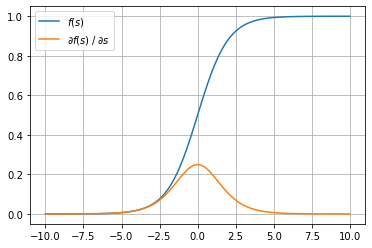

In [49]:
def f(s):
    return 1 / (1 + np.exp(-s))

def df(f_value):
    return f_value * (1 - f_value)

plt.plot(s, f(s))
plt.plot(s, df(f(s)))
plt.legend(('$f(s)$', '$\partial f(s) \; / \; \partial s$'))
plt.grid(True);

Let's try using stochastic gradient descent (SGD) to fit this "sigmoid" function to some data.  Find weight values that minimize the sum of squared errors in the output of this function.

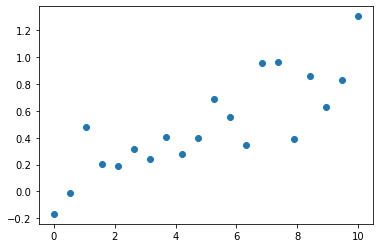

In [86]:
X = np.linspace(0, 10, 20).reshape((-1,1))
T = X * 0.1 + np.random.uniform(-0.4, 0.4, size=(20, 1))
# print(X.shape, T.shape)
plt.plot(X, T, 'o');

(1, 2) (1, 1) (1, 1)
w=array([[-2.03252147],
       [ 0.44089213]])


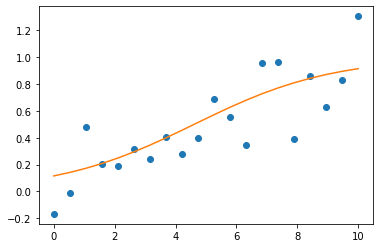

In [87]:
w = np.zeros((2, 1))
rho = 0.1
X1 = np.insert(X, 0, 1, 1)
for iter in range(100):
    for n in range(X.shape[0]):
        Xn = X1[n:n + 1, :]
        Tn = T[n:n + 1, :]
        yn = f(Xn @ w)
        w += rho * Xn.T* (Tn - yn) * df(yn) 
#     if iter==0:
#         print(Xn.shape, (Tn - yn).shape, df(yn).shape)
        
plt.plot(X, T, 'o')
plt.plot(X, f(X1 @ w))
print(f'{w=}')

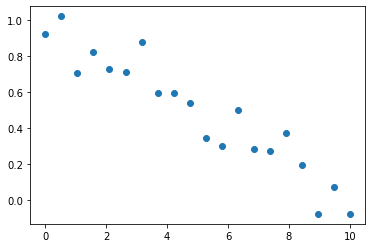

In [73]:
X = np.linspace(0, 10, 20).reshape((-1, 1))
T = 1 + -X * 0.1 + np.random.uniform(-0.2, 0.2, size=(20, 1))
plt.plot(X, T, 'o');

array([[ 2.17566248],
       [-0.45048748]])

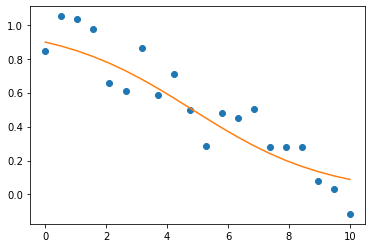

In [53]:
w = np.zeros((2, 1))
rho = 0.1
X1 = np.insert(X, 0, 1, 1)
for iter in range(100):
    for n in range(X.shape[0]):
        Xn = X1[n:n+1, :]
        Tn = T[n:n+1, :]
        yn = f(Xn @ w)
        w += rho * Xn.T * (Tn - yn) * df(yn)
        
plt.plot(X, T, 'o')
plt.plot(X, f(X1 @ w))
w

How would you use this function to fit this data?

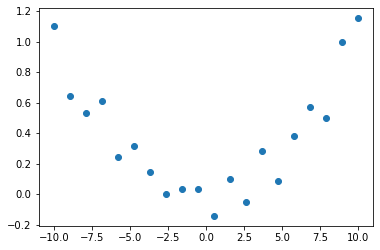

In [54]:
X = np.linspace(-10, 10, 20).reshape((-1, 1))
T = X**2 * 0.01 + np.random.uniform(-0.2, 0.2, size=(20, 1))
plt.plot(X, T, 'o');

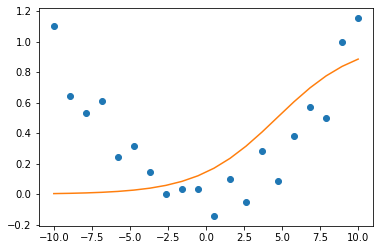

In [55]:
w = np.zeros((2, 1))
rho = 0.1
X1 = np.insert(X, 0, 1, 1)
for iter in range(100):
    for n in range(X.shape[0]):
        Xn = X1[n:n+1, :]
        Tn = T[n:n+1, :]
        yn = f(Xn @ w)
        w += rho * Xn.T * (Tn - yn) * df(yn)
        
plt.plot(X, T, 'o')
plt.plot(X, f(X1 @ w));

Right.  We could use two of these functions and add their outputs together.

Now we are talking multilayered neural networks!  One layer has two units that output $f(\xv^T \wv)$ each with their own $\wv$.  The second layer has one linear unit with its own $\wv$.

## Linear Models as Neural Networks

Given $X$ and $T$, find $\wv_k$ that minimizes squared error in
the $k^{th}$ output, then use it to make predictions.
Collect all $\wv_k$ as columns in $\Wv$.
$\tilde{\Xv}$ denotes $\Xv$ with a column of constant 1's prepended as first column.  The target value
for the $k^{th}$ output for the $n^{th}$ sample is $t_{n,k}$.

$$
\begin{align*}
  E(\Wv) &= \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - \tilde{\xv}_n^T \wv_k)^2\\
   \Wv &= (\tilde{\Xv}^T \tilde{\Xv})^{-1} \tilde{\Xv}^T \Tv\\
 ~\\
  \Wv &= \begin{bmatrix}
    w_{0,1} & w_{0,2} & \cdots & w_{0,K}\\
    w_{1,1} & w_{1,2} & \cdots & w_{1,K}\\
    \vdots\\
    w_{D,1} & w_{D,2} & \cdots & w_{D,K}
  \end{bmatrix}\\
 ~\\
  \Yv &= \tilde{\Xv} \Wv\\
  ~\\
\tilde{\Xv} & \text{ is } N \times (D+1)\\
\Wv & \text{ is } (D+1) \times K\\
\Yv & \text{ is } N \times K
\end{align*}
$$

The calculation of $y_{n,k} = \tilde{\xv_n} \wv_k$ can be drawn as


<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnlinear.png">


## Adding Nonlinear Combinations of Inputs

Transform $X$ into $\Phiv(X)$.  For example, 

$$
\Phiv(X) = \Phiv\left ( 
\begin{bmatrix}
    x_{0,1} & x_{0,2} & \cdots \\
    x_{1,1} & x_{1,2} & \cdots \\
    \vdots\\
    x_{N-1,1} & x_{N-1,2} & \cdots
  \end{bmatrix}
\right ) = 
\begin{bmatrix}
    x_{0,1} & x_{0,2}^5  & x_{0,2}^3 x_{0,4}^2 & \cdots \\
    x_{1,1} & x_{1,2}^5  & x_{1,2}^3 x_{1,4}^2 & \cdots\\
    \vdots\\
    x_{N-1,1} & x_{N-1,2}^5 & x_{N-1,2}^3 x_{N-1,4}^2 & \cdots
  \end{bmatrix}
$$

Now we just replace $\Xv$ by $\Phiv$ (which we use to represent
$\Phiv(X)$, and $\Phiv_n = \Phiv(\xv_n)$) and proceed. 
We do our derivation to minimize

$$
  E_k = \sum_{n=1}^N (t_{n,k} - \tilde\Phiv_n^T \wv_k))^2
$$

from which we find that 

$$
  \Wv = (\tilde{\Phiv}^T \tilde{\Phiv})^{-1} \tilde{\Phiv}^T T
$$

and use it like

$$
\begin{align*}
  \Yv = \tilde{\Phiv} \Wv
\end{align*}
$$

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnlinearphi.png">

Now, what should we put in the yellow box?  

Can we use the training data to figure this out?

## Structure of a Two Layer Neural Network

We have just entered the world of neural networks, with $\phi(\xv)$ being the output of another layer of adaptive units, or $\phi(\xv) = h(\xv)$. 

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoLayer.png">

$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \tilde{\Xv}$ 
$\quad\quad\quad\quad\quad \Vv $
$ \quad\quad\quad\quad\quad\quad\quad \tilde{\Zv} $ 
$\quad\quad\quad\quad\quad \Wv $ 
$\quad\quad\quad\quad \Yv$

$ \quad\quad\quad\quad\quad\quad\quad\quad\quad N \times (D+1)$
$\quad (D+1) \times M$
$ \quad\quad\quad N \times (M+1)$
$\quad (M+1)\times K$
$ \quad\quad N \times K$

$$
\begin{align*}
\tilde{\Zv} & = h(\tilde{\Xv} \Vv),\\
\Yv & = \tilde{\Zv} \Wv, \text{ or }\\
\Yv & = \tilde{h}(\tilde{\Xv} \Vv) \Wv 
\end{align*}
$$

The two layers are called the **hidden** and **output** layer.

$h$ is the **activation function** for the units in the hidden layer.

We will be doing gradient descent in the mean squared error, so want
an $h$ whose derivative doesn't grow out of control as $\vv$ grows, and whose
derivative is easy to calculate.

What about polynomials?

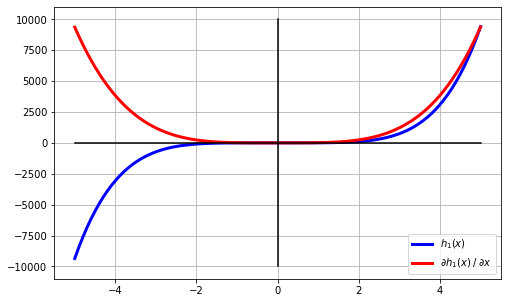

In [101]:
def h(s):
    return 3 + 2 * s + 1 * s**2 + 3 * s**5

def dh(s):
    return 2 + 2 * s + 15 * s**4

plt.figure(figsize=(8, 5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, h(xs), 'b-', linewidth=3, label='$h_1(x)$')
plt.plot(xs, dh(xs), 'r-', linewidth=3, label='$\partial h_1(x) \; / \; \partial x$')
plt.grid('on')
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-10000, 10000], 'k-')
plt.legend(loc='best');

A gradient descent procedure takes steps of size proportional to the derivative.  This derivative gets huge---high positive as $a$ increases and high negative as $a$ decreases---so gradient descent if very unstable.  Such huge steps will shoot the gradient descent far away from a close local minimum.

With $s = \tilde{\xv}^T \vv$, two common choices for functions with well-behaved derivatives are the asymmetric sigmoid function we already discussed, and the symmetric sigmoid, often calculated using $\tanh$.

  * sigmoid (asymmetric)
  
$$
        \begin{align*}
          h_1(s) & = \frac{1}{1+e^{-s}}
        \end{align*}
$$

  * tanh (symmetric)
  
$$
        \begin{align*}
          h_2(s) & = \tanh(s) = \frac{e^{s} - e^{-s}}{e^{s} + e^{-s}}
        \end{align*}
$$

Work out their derivatives in class.

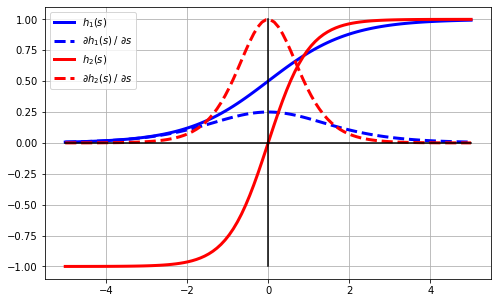

In [104]:
def h1(s):
    return 1 / (1 + np.exp(-s))

def h2(s):
    return np.tanh(s)

def dh1(s):
    y = h1(s)
    return y * (1 - y)

def dh2(s):
    y = h2(s)
    return 1 - y*y

plt.figure(figsize=(8, 5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, h1(xs), 'b-', linewidth=3, label='$h_1(s)$')
plt.plot(xs, dh1(xs), 'b--', linewidth=3, label='$\partial h_1(s) \; / \; \partial s$')

plt.plot(xs, h2(xs), 'r-', linewidth=3, label='$h_2(s)$')
plt.plot(xs, dh2(xs), 'r--', linewidth=3, label='$\partial h_2(s) \; / \; \partial s$')

plt.grid('on')
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 1], 'k-')
plt.legend(loc='best');

## Training by Gradient Descent

The mean squared error between each target value $t_{n,k}$ and
output (predicted) value $y_{n,k}$ is

$$
\begin{align*}
  E &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K ( t_{n,k} - y_{n,k})^2
\end{align*}
$$

Since $E$ is no longer a linear function of the parameters (weights), we cannot set the derivative equal to zero and solve for the parameters.  Instead, we can do 
gradient descent in $E$ by making small changes to weights $v_{j,m}$ and $w_{m,k}$ in the negative gradient direction. 

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial v_{j,m}}\\
  w_{m,k} &\leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

This is often presented as $\rho_h = \rho_o$, but having different
rates in the two layers often helps convergence rate.

Will this find the global optimum (the values of $v$ and $w$
that minimize the mean squared error)?

### First a Simplified View

Remember our picture of a full two-layer network?  Let's focus
on how to modify a single weight, $v_{1,1}$, based on a single error between $y_1$ and $t_1$.

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoLayerTargetsOnePath.png">

Let's drop the subscripts for now.

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnOnePath.png">

Forward calculation (ignoring constant 1 input and all other terms)

$$
\begin{align*}
  y &= w\; h(v\;x) \text{ or }\\
  y &= w\; z\\
  z &= h(a)\\
  a &= v\; x
\end{align*}
$$

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnOnePath2.png">

Since $E = (t - y)^2$

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t - y)^2}{\partial v}
\end{align*}
$$

The Chain Rule to the rescue.

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t-y)^2}{\partial v}\\
  & = \frac{\partial (t-y)^2}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
  & = 2(t-y) \;\;(-1)\;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
\end{align*}
$$

If $h(a) = \tanh(a)$, then $\frac{\partial h(a)}{\partial a} = (1-h(a)^2) = (1-z^2)$. See [this page at Mathematics Stack Exchange](http://math.stackexchange.com/questions/741050/hyperbolic-functions-derivative-of-tanh-x).

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = -2(t-y) \;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
  & = -2(t-y) \;\; w \;\;  (1-z^2) \;\; x
\end{align*}
$$

Let's add another output.

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoPath.png">

The Chain Rule again.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial v}\\
       & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial y_1}\frac{\partial y_1}{\partial z} + \frac{\partial (y_1-t_1)^2 + (y_2-t_2)^2}{\partial y_2}\frac{\partial
           y_2}{\partial z} \right )  \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( -2(t_1-y_1) w_1 - 2(t_2 -y_2) w_2 \right ) \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) \frac{\partial h(a)}{\partial a} x \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x 
       \end{align*}
$$

Think of the errors calculated in the output units as being sent backwards to the units in the previous layer.  If we label these errors as "delta" values, our derivative expressions form what are commonly referred to as "delta rules".  The delta values are "backpropagated" to the previous layer.  This process is called "error backpropagation", but is really just the chain rule of calculating derivatives!

First, remember these derivatives.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = -2 ( (t_1-y_1) w_1 + (t_2-y_2) w_2  ) (1-z^2) x \\
       \frac{\partial E}{\partial w_1} & = -2 (t_1-y_1) z
       \end{align*}
$$

Now the update rules involving the deltas ($\delta$) are 

$$
       \begin{align*}
       w &\leftarrow w - \frac{\partial E}{\partial w_1}\\
       &\leftarrow w + \rho_o  (t_1-y_1) z\\
       &\leftarrow w + \rho_o  \delta_1^{(o)}  z\\
       v & \leftarrow v - \frac{\partial E}{\partial v}\\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \delta^{(h)} x\\
&\;\;\; \text{ where } \delta^{(h)} =  ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2  ) (1-z^2)
       \end{align*}
$$

### Now for the Full Version of Back-Propagation

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnTwoLayerBackProp.png">

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial
    v_{j,m}}\\
 w_{m,k} & \leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

A bit of calculus and algebra lead us to these expressions for doing gradient descent.

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} + \rho_h \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) w_{m,k} (1-\tilde{z}_m^2) \tilde{x}_{n,j}\\
  w_{m,k} &\leftarrow w_{m,k} + \rho_o \frac{1}{NK} \sum_{n=1}^N
  (t_{n,k} - y_{n,k}) \tilde{z}_m
\end{align*}
$$

Now we will derive this result.
First work on $\frac{\partial E}{\partial w_{m,k}}$.

$$
\begin{align*}
  E &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial w_{m,k}}\\
  \text{Since } & y_{n,k'} = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) 
  \frac{\partial \left ( \sum_{m'=0}^M w_{m',k'} \tilde{z}_{n,m'}  \right )}{\partial w_{m,k}}\\
  & = -2 \frac{1}{NK} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
\end{align*}
$$

Now the hard one,  $\frac{\partial E}{\partial v_{j,m}}$.

$$
\begin{align*}
  E &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial  v_{j,m}}
\end{align*}
$$

Knowing that 

$$
\begin{align*}
  y_{n,k'} & = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  &  = \sum_{m'=0}^M  w_{m',k'} \tilde{h}\left ( \sum_{j'=0}^D
    v_{j,m'} \tilde{x}_{n,j'} \right )
\end{align*}
$$

we can continue.

$$
\begin{align*}
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) 
  \frac{\partial \left ( \sum_{m'=0}^M  w_{m',k'} \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'} \right ) \right )}{\partial v_{j,m}}\\ 
  \text{Let } a_{n,m'} & = \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'}  \right )\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} 
  \frac{\partial \tilde{h}(a_{n,m'})}{\partial  a_{n,m'}} \frac{\partial a_{n,m'}}{\partial v_{j,m}}\\
  & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} \frac{\partial \tilde{h}(a_{n,m'})}{\partial a_{n,m'}} \tilde{x}_{n,j}
\end{align*}
$$

To summarize:

$$
    \begin{align*}
      E &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N}  \frac{1}{K}
       \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}
    \end{align*}
$$

Forward pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}
    \end{align*}
$$

Backward pass

$$
\begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{NK}  \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
    \end{align*}
$$

Backward pass with $\delta$ terms

$$
\begin{align*}
   \delta_{n,k}^w &= t_{n,k} - y_{n,k}\\
      \delta_{n,m}^v &= \sum_{k=1}^K \delta_{n,k}^w w_{m,k} (1 - z_{n,m}^2)\\
\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \sum_{n=1}^N \delta_{n,m}^v \tilde{x}_{n,j}\\
\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{NK}  \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{NK} \sum_{n=1}^N \delta_{n,k}^w \tilde{z}_{n,m}
    \end{align*}
$$

## Preparing for Python

Convert these scalar expressions to matrix expressions.

Forward Pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      z_{n,m} &= h( v_{*,m} \tilde{x}_{n,*})\\
      z_{n,m} &= h(  \tilde{x}_{n,*} v_{*,m})\\
      z_{*_n,m} &= h(  \tilde{x}_{*_n,*} v_{*,m})\\
      z_{*_n,*_m} &= h(  \tilde{x}_{*_n,*} v_{*,*_m})\\
      \Zv &= h(\tilde{\Xv} \Vv)\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}\\
      y_{n,k} &=  \tilde{z}_{n,*} w_{*,k}\\
      y_{*_n,*_k} &=  \tilde{z}_{*_n,*} w_{*,*_k}\\
      \Yv &= \tilde{\Zv} \Wv
    \end{align*}
$$


Backward Pass for $\Wv$

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{NK} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      & \leftarrow w_{m,k} + \rho_o \frac{1}{NK} (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m}
    \end{align*}
$$

Almost.  Check the shapes of left and right hand sides of last equation. Result on right hand side has subscripts $k,m$ but left side is $m,k$. So

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{NK}   \left ( (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m} \right )^T\\
       & \leftarrow w_{m,k} + \rho_o \frac{1}{NK} \tilde{z}_{*_n,m}^T (t_{*_n,k} - y_{*_n,k}) \\
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{NK}  \tilde{z}_{*_n,*_m}^T (t_{*_n,*_k} - y_{*_n,*_k}) \\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{NK}  \tilde{\Zv}^T (\Tv - \Yv)\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{NK}  \tilde{\Zv}^T \dimensionbar{M+1 \times N} (\Tv - \Yv \dimensionbar{N\times K}) \dimensionbar{M+1 \times K}
    \end{align*}
$$
Or, with the $\delta$ terms we have
$$
    \begin{align*}
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{NK}  \tilde{z}_{*_n,*_m}^T (t_{*_n,*_k} - y_{*_n,*_k}) \\
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{NK}  \tilde{z}_{*_n,*_m}^T \delta^w_{*_n, *_k} \\
      \Dv^w &= \delta^w_{*_n, *_k}\\
      \Dv^w &= T - Y\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{NK}  \tilde{\Zv}^T \Dv^w\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{NK}  \tilde{\Zv}^T \dimensionbar{M+1 \times N} \Dv^w \dimensionbar{N\times K}) \dimensionbar{M+1 \times K}
    \end{align*}
$$

Backward Pass for $\Vv$

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \sum_{n=1}^N  (t_{n,*_k} - y_{n,*_k}) w_{m,*_k}^T   (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \dimensionbar{N\times m} \right )^T
      \tilde{x}_{*_n,j} 
\end{align*}
$$

Almost.  Result on right hand side has subscripts $m,j$, but left side is $j,m$. So

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \left ( \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )^T
      \tilde{x}_{*_n,j} \right )^T\\
       & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \tilde{x}_{*_n,j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )\\
       v_{*_j,*_m} & \leftarrow v_{*_j,*_m} + \rho_h \frac{1}{NK} \tilde{x}_{*_n,*_j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{*_m,*_k}^T \cdot  (1-z_{*_n,*_m}^2)
       \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{NK} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{NK} \tilde{\Xv}^T \dimensionbar{D+1 \times N} \left ( (\Tv - \Yv) \dimensionbar{N\times K} \hat{\Wv}^T \dimensionbar{N\times M} \cdot  (1-\Zv^2)
         \dimensionbar{N\times M}\right ) \dimensionbar{D+1 \times M}\\
       \text{where } & \hat{\Wv} \text{ is } \Wv \text{ without constant input row}
\end{align*}
$$
Or, again, with the $\delta$ terms we have
$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \left ( \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )^T
      \tilde{x}_{*_n,j} \right )^T\\
       & \leftarrow v_{j,m} + \rho_h \frac{1}{NK} \tilde{x}_{*_n,j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )\\
       v_{*_j,*_m} & \leftarrow v_{*_j,*_m} + \rho_h \frac{1}{NK} \tilde{x}_{*_n,*_j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{*_m,*_k}^T \cdot  (1-z_{*_n,*_m}^2)
       \right )\\
      \delta_{n,m}^v &= \sum_{k=1}^K \delta_{n,k}^w w_{m,k} (1 - z_{n,m}^2)\\
      \delta_{n,m}^v &= \delta_{n,*_k}^w w_{m,*_k}^T (1 - z_{n,m}^2)\\
      \delta_{*_n,m}^v &= \delta_{*_n,*_k}^w w_{m,*_k}^T (1 - z_{*_n,m}^2)\\
      \Dv^v &= \Dv^w \hat{\Wv}^T \cdot (1 - \Zv^2)\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{NK} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{NK} \tilde{\Xv}^T \Dv^v\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{NK} ( \tilde{\Xv}^T \dimensionbar{D+1 \times N} \Dv^v \dimensionbar{N\times M} ) \dimensionbar{D+1 \times M}\\
       \text{where } & \hat{\Wv} \text{ is } \Wv \text{ without constant input row}
    \end{align*}
$$


All together now, first in math.

$$
    \begin{align*}
      \Zv &= h(\tilde{\Xv} \Vv)\\
      \Yv &= \tilde{\Zv} \Wv\\
      \Dv^w &= \Tv - \Yv\\
      \Dv^v &= \Dv^w \hat{\Wv}^T \cdot (1 - \Zv^2)\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{NK}\tilde{\Zv}^T \Dv^w\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{NK} \tilde{\Xv}^T \Dv^v\\
      \end{align*}
$$

Now in python.

    # Given input X and target T, do forward pass to calculate network output, Y
    ro = ro / (N * K)
    rh = rh / (N * K)
    X1 = addOnes(X)
    Z = tanh(X1 @ V))
    Z1 = addOnes(Z)
    Y = Z1 @ W
    # Do gradient descent on derivative of squared error with respect to each weight to update V and W.
    Dw = T - Y
    Dv = Dw @ W[1:, :].T * (1 - Z**2)
    W = W + ro * Z1.T @ Dw
    V = V + rh * X1.T @ Dv

## Finally, the Code

The above equations show a single step down the gradient of our mean square error, $E$. Here we are using all of our training data, in $X$ and $T$ to calculate the gradient of $E$ with respect to the weights.  Instead of writing  a for loop to step through each sample and update the weights on each step, which we called (Stochastic Gradient Descent), we are using the full gradient.

Here is an example. Let's fit a neural network to the function

$$
f(x) = 0.2 + 0.05 (x+10) + 0.4 \sin(x+10)) + 0.2 \epsilon
$$

where $\epsilon$ is a random variable drawn from the standard normal
distribution, or $\epsilon \sim \mathcal{N}(0,1)$, and $x \in [-10,10]$.

In [105]:
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [106]:
# Make some training data
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))
print(Xtrain.shape, Ttrain.shape)

(30, 1) (30, 1)


So far we have worked on reducing the error on the data we have as much as possible.  Really what we want from our machine learning models is models that generalize well, meaning that they produce small errors on new data that was not used to train our model.  So, let's make some new, testing, data.

In [107]:
# Make some testing data
Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

nSamples = Xtrain.shape[0]
nOutputs = Ttrain.shape[1]
print(nSamples, nOutputs)

30 1


In [108]:
# Add constant column of 1's
def add_ones(A):
    return np.insert(A, 0, 1, axis=1)

In [109]:
A = np.random.uniform(-1, 1, size=(5, 3))  # 5 samples, each having 3 components
A

array([[-0.19669323,  0.94459727, -0.60642051],
       [ 0.83104512, -0.40234034,  0.59248881],
       [ 0.8986011 , -0.31411286, -0.42642518],
       [-0.94053359,  0.57620452,  0.15055288],
       [ 0.52923929,  0.91180775, -0.09775193]])

In [110]:
add_ones(A)

array([[ 1.        , -0.19669323,  0.94459727, -0.60642051],
       [ 1.        ,  0.83104512, -0.40234034,  0.59248881],
       [ 1.        ,  0.8986011 , -0.31411286, -0.42642518],
       [ 1.        , -0.94053359,  0.57620452,  0.15055288],
       [ 1.        ,  0.52923929,  0.91180775, -0.09775193]])

We will need an RMSE function that also unstandardizes the error.

In [111]:
def rmse(T, Y, Tstds):
    error = (T - Y) * Tstds 
    return np.sqrt(np.mean(error ** 2))

Let's standardize the inputs and targets. This can help with the selection of learning rates.

To standardize the inputs in $X$, subtract the column means and divide the result by the column standard deviations.  Do the same for the target values in $T$.

In [113]:
Xmeans = Xtrain.mean(axis=0)
Xstds = Xtrain.std(axis=0)
Tmeans = Ttrain.mean(axis=0)
Tstds = Ttrain.std(axis=0)

XtrainS = (Xtrain - Xmeans) / Xstds
TtrainS = (Ttrain - Tmeans) / Tstds
XtestS = (Xtest - Xmeans) / Xstds
TtestS = (Ttest - Tmeans) / Tstds
print(XtrainS.shape, TtrainS.shape, XtestS.shape, TtestS.shape)

(30, 1) (30, 1) (30, 1) (30, 1)


Now, to prepare for our matrix operations, prepend the column of constant ones to $X$.

In [115]:
XtrainS1 = add_ones(XtrainS)
XtestS1 = add_ones(XtestS)
print(XtrainS1.shape, XtestS1.shape)

(30, 2) (30, 2)


We must initialize the weights to random values. If all weights are initialized to zero, all hidden units will learn identical weights, as if we only have one hidden unit.  Why is this so?

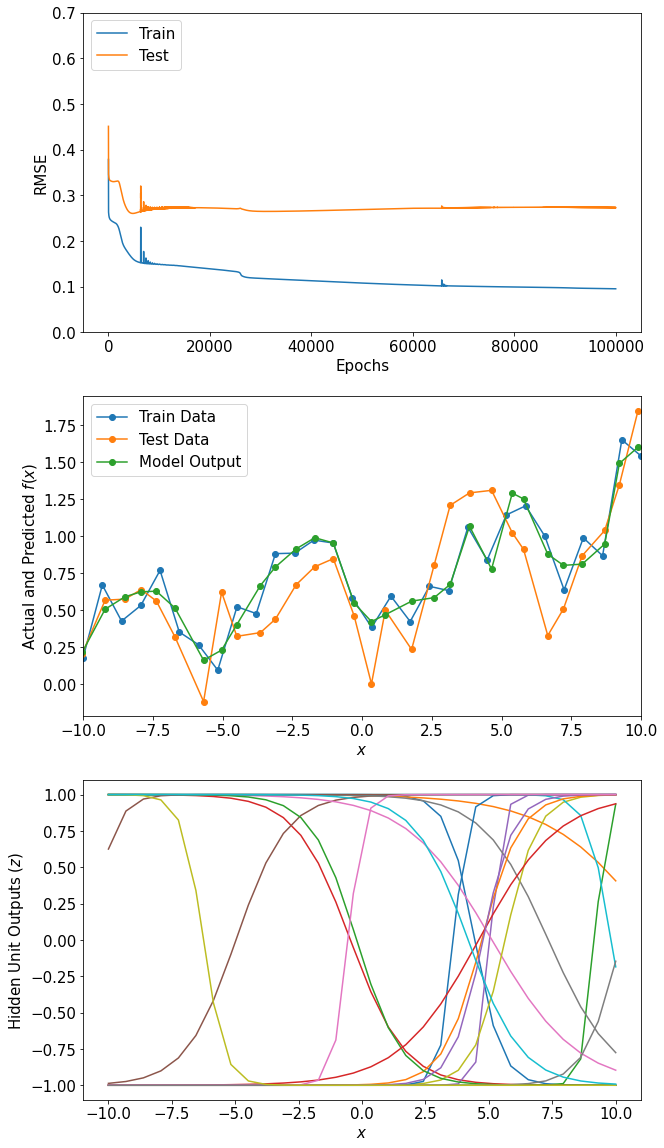

In [138]:
import matplotlib as mpl
# plt.rcParams.update({'font.size': 20})

# Set parameters of neural network
n_hiddens = 20

n_samples, n_outputs = Ttrain.shape

rho_h = 0.5
rho_o = 0.1

rho_h = rho_h / (n_samples * n_outputs)
rho_o = rho_o / (n_samples * n_outputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = np.random.uniform(-1, 1, size=(1 + 1, n_hiddens)) / np.sqrt(XtrainS1.shape[1])
W = np.random.uniform(-1, 1, size=(1 + n_hiddens, n_outputs)) / np.sqrt(n_hiddens + 1)

# Take n_epochs steepest descent steps in gradient descent search in mean-squared-error function
n_epochs = 100000

# collect training and testing errors for plotting
error_trace = []

fig = plt.figure(figsize=(10, 20))

for epoch in range(n_epochs):

    # Function we wish to minimize, mean squared error
    # ------------------------------------------------
    # Forward pass on all training data
    Z = np.tanh(XtrainS1 @ V)
    print(Z.shape)
    Z1 = add_ones(Z)
    Y = Z1 @ W
    mse = np.mean((TtrainS - Y)**2)
    
    # Gradient of mean squared error with respect to V and W
    # ------------------------------------------------------
    Dw = TtrainS - Y
    Dv = Dw @ W[1:, :].T * (1 - Z**2)
    grad_wrt_W = - Z1.T @ Dw
    grad_wrt_V = - XtrainS1.T @ Dv
    
    # Take step down the gradient
    W = W - rho_o * grad_wrt_W
    V = V - rho_h * grad_wrt_V  

    # Apply model with new weights to train and test data, calculate the RMSEs and append to error_trace
    YtrainS = add_ones(np.tanh(XtrainS1 @ V)) @ W    # Forward pass in one line !!
    YtestS = add_ones(np.tanh(XtestS1 @ V)) @ W 
    error_trace.append([rmse(TtrainS, YtrainS, Tstds),
                        rmse(TtestS, YtestS, Tstds)])
    
    if epoch % 2000 == 0 or epoch == n_epochs - 1:
        
        with plt.rc_context({'font.size': 15}):
            plt.clf()
            plt.subplot(3, 1, 1)
            plt.plot(np.array(error_trace)[:epoch, :])
            plt.ylim(0, 0.7)
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            plt.legend(('Train','Test'), loc='upper left')

            plt.subplot(3, 1, 2)
            Ytest = YtestS * Tstds + Tmeans
            plt.plot(Xtrain, Ttrain, 'o-', label='Train Data')
            plt.plot(Xtest, Ttest, 'o-', label='Test Data')
            plt.plot(Xtest, Ytest, 'o-', label='Model Output')
            plt.xlim(-10, 10)
            plt.legend(loc='upper left')
            plt.xlabel('$x$')
            plt.ylabel('Actual and Predicted $f(x)$')

            plt.subplot(3, 1, 3)
            plt.plot(Xtrain, Z)
            plt.ylim(-1.1, 1.1)
            plt.xlabel('$x$')
            plt.ylabel('Hidden Unit Outputs ($z$)');

            ipd.clear_output(wait=True)
            ipd.display(fig)
        
ipd.clear_output(wait=True)